# Milka Vladislav

In [2]:
N = (12 + 4 ) % 5 + 1
N

2

| Варіант 2 | 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27 |
|----------|----------|




In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("NationalNames.csv")


In [4]:
column_names = data.columns
column_names


Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [6]:
data.describe()



,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [7]:
unique_names_count = data['Name'].nunique()
unique_names_count

93889

In [8]:
year = 1944
data_2022 = data[data['Year'] == year]
most_popular_name_index = data_2022['Count'].idxmax()
most_popular_name = data_2022.loc[most_popular_name_index, 'Name']
print(f"The name is {most_popular_name} in {year}")


The name is James in 1944


In [9]:
min_count = data['Count'].min()  
min_count_records = data[data['Count'] == min_count]  
count_min_records = len(min_count_records)
count_min_records

254615

In [10]:
data_2008 = data[data['Year'] == 2008]
data_2008 = data_2008[['Name', 'Count']]
data_2008[data_2008['Count'] == data_2008['Count'].max()]


,Name,Count
1608302,Jacob,22568


In [11]:
result = data.groupby('Year')['Name'].nunique().reset_index()
result[result['Name'] == result['Name'].max()]


,Year,Name
128,2008,32488


In [12]:
most_popular_year_jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum().idxmax()
result = data[(data['Year'] == most_popular_year_jacob_female) & (data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
result


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [13]:
neutral_names = data[(data['Gender'] == 'M') | (data['Gender'] == 'F')]
yearly_neutral_name_variety = neutral_names.groupby('Year')['Name'].nunique()
most_variety_neutral_year = yearly_neutral_name_variety.idxmax()

most_variety_neutral_year


2008

In [14]:
most_births_year = data.groupby('Year')['Count'].sum().idxmax()
most_births_year

1957

In [15]:
gender_counts_by_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack().head()
gender_counts_by_year


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [16]:
gender_counts_by_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_with_more_girls = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()
years_with_more_girls

54

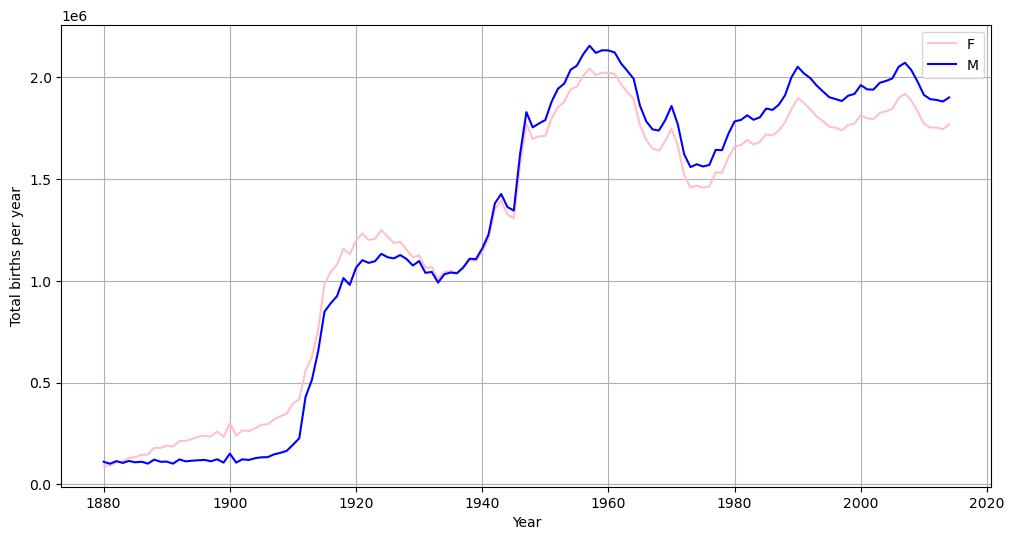

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gender_counts_by_year.index, gender_counts_by_year['F'], label='F', color='pink')
plt.plot(gender_counts_by_year.index, gender_counts_by_year['M'], label='M', color='blue')
plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
name_gender_counts = data.groupby(['Name', 'Gender'])['Count'].sum().unstack()
gender_neutral_names_count = name_gender_counts[(name_gender_counts['F'] > 0) & (name_gender_counts['M'] > 0)].shape[0]
gender_neutral_names_count


10221

In [19]:
years_observed = data['Year'].max() - data['Year'].min() + 1
years_observed

135

In [14]:
# Вибираємо гендерно нейтральні імена
neutral_names = data[(data['Gender'] == 'M') | (data['Gender'] == 'F')]

# Залишаємо імена, які використовувалися кожного року
year_counts = neutral_names.groupby('Name')['Year'].nunique()
names_in_every_year = year_counts[year_counts == len(data['Year'].unique())].index

# Підраховуємо кількість використань кожного імені та сортуємо від найбільшого
name_counts = data[data['Name'].isin(names_in_every_year)].groupby('Name')['Count'].sum()
name_counts = name_counts.sort_values(ascending=False).head()

name_counts


Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
Name: Count, dtype: int64

In [28]:
name_counts = data.groupby('Name')['Count'].sum()

rare_names = name_counts[name_counts == name_counts.min()]

most_popular_rare_name = rare_names.idxmax()
most_popular_rare_name

print(f"Найбільш популярне з непопулярних {most_popular_rare_name}. Ним назвали {name_counts[most_popular_rare_name]} разів")

Найбільш популярне з непопулярних Aabid. Ним назвали 5 разів


In [22]:
most_popular_names = data.groupby(['Year'])['Count'].idxmax()
result = data.loc[most_popular_names, ['Year', 'Name', 'Count']]
result = result.reset_index(drop=True)
result

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147
